In [45]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_and_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    f = "./%s.png" % file_name
    plt.imshow(npimg)
    plt.imsave(f,npimg)

In [47]:
class RBM(nn.Module):
    def __init__(self,
                 n_vis=784,
                 n_hid=500,
                 burn_in=5):
        super(RBM, self).__init__()
        self.W = nn.Parameter(?)
        self.x_bias = nn.Parameter(?)
        self.y_bias = nn.Parameter(?)
        self.burn_in = burn_in
    
    def sample_from_p(self, p):
        return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
    def x_to_y(self, x):
        p_y = F.sigmoid(F.linear(x,self.W,self.y_bias))
        sample_y = self.sample_from_p(p_y)
        return p_y,sample_y
    
    def y_to_x(self, y):
        p_x = F.sigmoid(F.linear(y,self.W.t(),self.x_bias))
        sample_x = self.sample_from_p(p_x)
        return p_x,sample_x
        
    def forward(self, x):
        _, y1 = self.x_to_y(x)
        
        y_ = y1
        for _ in range(self.burn_in):
            _, x_ = self.y_to_x(y_)
            _, y_ = self.x_to_y(x_)
        
        return x, x_
    
    def log_interaction(self,x):
        xbias_term = x.mv(self.x_bias)
        wx_b = F.linear(x,self.W,self.y_bias)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        
        return (-hidden_term - xbias_term).mean()

In [48]:


batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size)



In [50]:
rbm = RBM(burn_in=1)
train_op = optim.?

In [52]:
for epoch in ?:
    loss_ = []
    for _, (data,_) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        x, x_tilde = rbm(sample_data)
        loss = ?
        loss_.append(loss.item())
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    
    print(np.mean(loss_))

-8.337029593331474
-6.770113589158699
-4.7111711969761965
-3.279859302903035
-2.3204944016836855
-1.6408046567872134
-1.1491709629864073
-0.7365932505268024
-0.45718806740571694
-0.2845656144847748


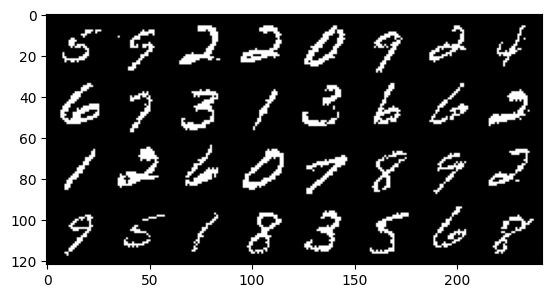

In [43]:
show_and_save("real",make_grid(x.cpu().view(32,1,28,28).data))

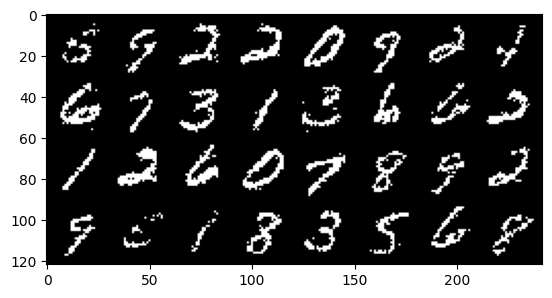

In [44]:
show_and_save("generate",make_grid(x_tilde.cpu().view(32,1,28,28).data))

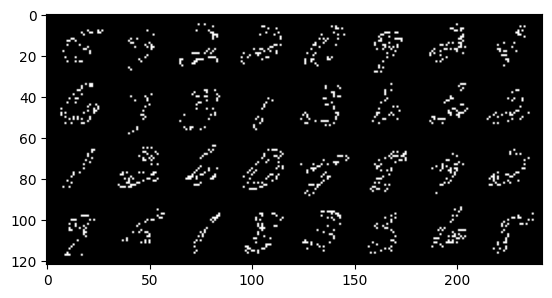

In [31]:
show_and_save("difference",make_grid((torch.abs(x - x_tilde)).cpu().view(32,1,28,28).data))